In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load,dump
%matplotlib inline

In [2]:
from platform import python_version
python_version()

'3.9.7'

In [3]:
#Importar os pacotes do scikit learn
from sklearn import tree, feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#Metricas
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, plot_roc_curve, plot_confusion_matrix

Carregando Datasets

In [4]:
dfEmployee = pd.read_csv("data/employee_survey_data.csv")
dfGeneral = pd.read_csv("data/general_data.csv")
dfManagerData = pd.read_csv("data/manager_survey_data.csv")

In [5]:
dfEmployee.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [6]:
dfGeneral.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


In [7]:
dfManagerData.head(3)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


In [8]:
dfEmployee.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [9]:
dfGeneral.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
dfManagerData.isna().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Consigo ver claramente que existem valores faltantes, mas são bem poucos, o que me permite removê-los
Para remover todas as linhas faltantes irei realizar um merge nos datasets

In [11]:
df = pd.merge(dfEmployee,dfGeneral, on= "EmployeeID", how = "inner")

In [12]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [13]:
dfTotal = pd.merge(df, dfManagerData, on = "EmployeeID", how = "inner")

In [14]:
dfTotal.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


In [15]:
dfTotal.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [16]:
dfTotal.dropna(axis = 0,inplace=True)
dfTotal.isna().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [17]:
dfTotal.drop("EmployeeID", axis = 1, inplace=True)

In [18]:
types = dfTotal.dtypes
unique = dfTotal.nunique()
dfInfo = pd.DataFrame({"Tipos":types, "Unicos":unique})
dfInfo

,Tipos,Unicos
EnvironmentSatisfaction,float64,4
JobSatisfaction,float64,4
WorkLifeBalance,float64,4
Age,int64,43
Attrition,object,2
BusinessTravel,object,3
Department,object,3
DistanceFromHome,int64,29
Education,int64,5
EducationField,object,6


In [19]:
dfTotal.drop(["Over18", "JobInvolvement","EmployeeCount", "StandardHours"], axis=1, inplace=True)

In [20]:
dfTotal.head(3)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,131160,1.0,11,0,1.0,6,1,0,0,3
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,41890,0.0,23,1,6.0,3,5,1,4,4
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,193280,1.0,15,3,5.0,2,5,0,3,3


Podemos começar tentando estabelecer uma relação entre as variáveis

In [21]:
dfEnvMean = pd.DataFrame(dfTotal.groupby("Attrition")["EnvironmentSatisfaction"].mean()).reset_index()
dfEnvMean

,Attrition,EnvironmentSatisfaction
0,No,2.773648
1,Yes,2.466187


In [22]:
dfSatisMean = pd.DataFrame(dfTotal.groupby("Attrition")["JobSatisfaction"].mean()).reset_index()
dfSatisMean

,Attrition,JobSatisfaction
0,No,2.774757
1,Yes,2.466187


In [23]:
dfWorkLifeMean = pd.DataFrame(dfTotal.groupby("Attrition")["WorkLifeBalance"].mean()).reset_index()
dfWorkLifeMean

,Attrition,WorkLifeBalance
0,No,2.779750
1,Yes,2.664748


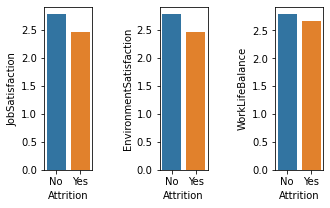

In [24]:
plt.figure(figsize=(5,3))
plt.subplot(151)
sns.barplot(x = "Attrition", y = "JobSatisfaction", data = dfSatisMean)
plt.subplot(153)
sns.barplot(x = "Attrition", y = "EnvironmentSatisfaction", data = dfEnvMean)
plt.subplot(155)
sns.barplot(x = "Attrition", y = "WorkLifeBalance", data = dfWorkLifeMean)
plt.show()

In [25]:
#Calculando o percentual de atrito em cada um dos departamentos
totalRH = dfTotal[dfTotal["Department"] == "Human Resources"]["Department"].count()
totalRD = dfTotal[dfTotal["Department"] == "Research & Development"]["Department"].count()
totalSales = dfTotal[dfTotal["Department"] == "Sales"]["Department"].count()
totalRHAttr = dfTotal[dfTotal["Department"] == "Human Resources"][dfTotal["Attrition"] == "Yes"]["Attrition"].count()
totalRDAttr = dfTotal[dfTotal["Department"] == "Research & Development"][dfTotal["Attrition"] == "Yes"]["Attrition"].count()
totalSalesAttr = dfTotal[dfTotal["Department"] == "Sales"][dfTotal["Attrition"] == "Yes"]["Attrition"].count()

percentAttrRH = totalRHAttr/totalRH*100
percentAttrRD = totalRDAttr/totalRD*100
percentAttrSales = totalSalesAttr/totalSales*100

dfPercPorDepartamento = pd.DataFrame({"RH":[percentAttrRH],"RD":[percentAttrRD],"Sales":[percentAttrSales]})
dfPercPorDepartamento

C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_33884/3506748058.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalRHAttr = dfTotal[dfTotal["Department"] == "Human Resources"][dfTotal["Attrition"] == "Yes"]["Attrition"].count()
C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_33884/3506748058.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalRDAttr = dfTotal[dfTotal["Department"] == "Research & Development"][dfTotal["Attrition"] == "Yes"]["Attrition"].count()
C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_33884/3506748058.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalSalesAttr = dfTotal[dfTotal["Department"] == "Sales"][dfTotal["Attrition"] == "Yes"]["Attrition"].count()


,RH,RD,Sales
0,29.032258,15.781974,15.149197


<AxesSubplot:xlabel='Age', ylabel='Count'>

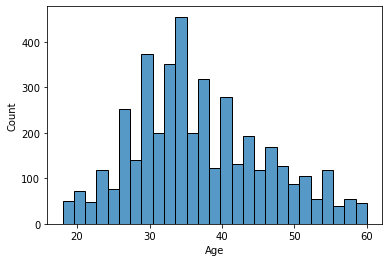

In [26]:
sns.histplot(dfTotal["Age"])

In [27]:
#Criando faixas de idade afim de verificar se há uma tendência maior de atrito a depender da faixa de idade do funcionário
def SeparaFaixa(registro):
    retorno = ""
    if registro >=15 and registro < 25:
        retorno = "15..25"
    elif registro >= 25 and registro < 35:
        retorno = "25..35"
    elif registro >= 35 and registro < 45:
        retorno = "35..45"
    elif registro >= 45 and registro < 55:
        retorno = "45..55"
    elif registro >= 55 and registro < 65:
        retorno = "55..65"
    return retorno

dfIdade = dfTotal[["Age","Attrition"]]

dfIdade["Faixas"] = dfIdade["Age"].map(SeparaFaixa)
dfIdade

C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_33884/2085669656.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIdade["Faixas"] = dfIdade["Age"].map(SeparaFaixa)


,Age,Attrition,Faixas
0,51,No,45..55
1,31,Yes,25..35
2,32,No,25..35
3,38,No,35..45
4,32,No,25..35
...,...,...,...
4404,29,No,25..35
4405,42,No,35..45
4406,29,No,25..35
4407,25,No,25..35


In [28]:
dfPorIdade = pd.DataFrame(dfIdade.groupby("Faixas")["Attrition"].value_counts())
dfPorIdade = dfPorIdade.rename(columns={"Attrition":"Count"}).reset_index()

dfStockOptions = pd.DataFrame(dfTotal.groupby("StockOptionLevel")["Attrition"].value_counts())
dfStockOptions = dfStockOptions.rename(columns={"Attrition":"Count"}).reset_index()
dfStockOptions

,StockOptionLevel,Attrition,Count
0,0,No,1535
1,0,Yes,311
2,1,No,1475
3,1,Yes,263
4,2,No,382
5,2,Yes,84
6,3,No,213
7,3,Yes,37


<Figure size 1080x576 with 0 Axes>

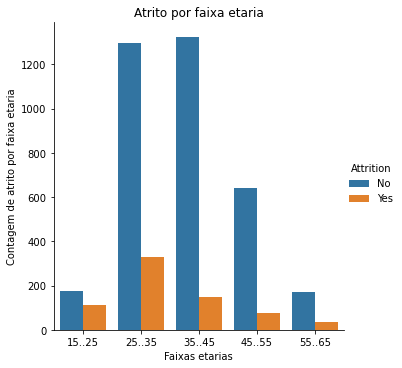

In [29]:
plt.figure(figsize=(15,8))

sns.catplot(data = dfPorIdade, kind = "bar",
           x = "Faixas", y = "Count", hue = "Attrition")
plt.title("Atrito por faixa etaria")
plt.xlabel("Faixas etarias")
plt.ylabel("Contagem de atrito por faixa etaria")

plt.show()

<Figure size 432x288 with 0 Axes>

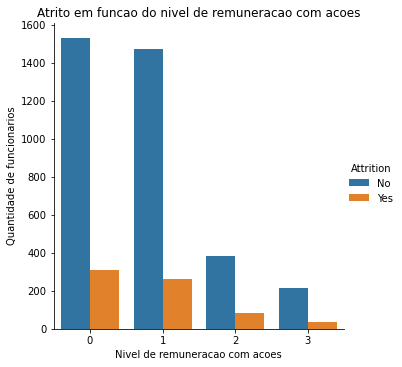

In [30]:
plt.figure()
sns.catplot(data = dfStockOptions, kind = "bar",
           x = "StockOptionLevel", y = "Count",hue = "Attrition" )
plt.xlabel("Nivel de remuneracao com acoes")
plt.ylabel("Quantidade de funcionarios")
plt.title("Atrito em funcao do nivel de remuneracao com acoes")
plt.show()

In [31]:
dfEducationField =pd.DataFrame(dfTotal.EducationField.value_counts())
dfEducationField["Percentual"] =round(dfEducationField["EducationField"]/dfTotal.shape[0]*100,2)
dfEducationField

,EducationField,Percentual
Life Sciences,1766,41.07
Medical,1364,31.72
Marketing,469,10.91
Technical Degree,384,8.93
Other,237,5.51
Human Resources,80,1.86


<Figure size 648x360 with 0 Axes>

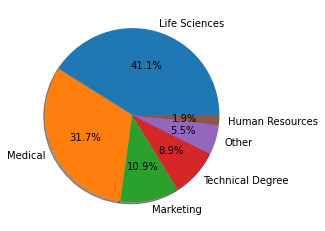

In [32]:
plt.figure(figsize=(9,5))
fig, ax = plt.subplots()
ax.pie(dfEducationField.Percentual, labels = dfEducationField.index, autopct='%1.1f%%',
        shadow = True)
plt.show()

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

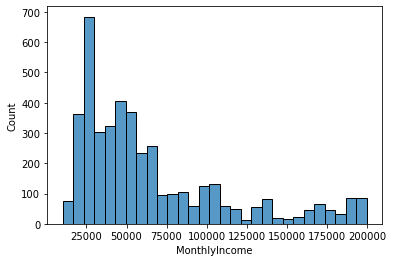

In [33]:
sns.histplot(dfTotal.MonthlyIncome)

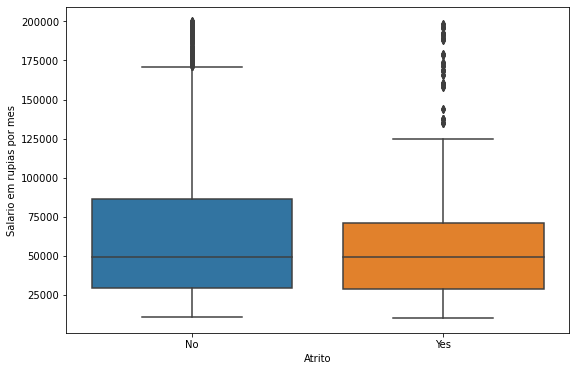

In [34]:
plt.figure(figsize=(9,6))
sns.boxplot(x = dfTotal.Attrition ,y = dfTotal.MonthlyIncome)
plt.xlabel("Atrito")
plt.ylabel("Salario em rupias por mes")
plt.show()

In [35]:
dfNumerico = dfTotal.select_dtypes(["float64","int64"])
level_map = {"No":0,"Yes":1}
dfNumerico["Attrition"] = dfTotal.Attrition.map(level_map)
corr = dfNumerico.corr()

C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_33884/2886753863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumerico["Attrition"] = dfTotal.Attrition.map(level_map)


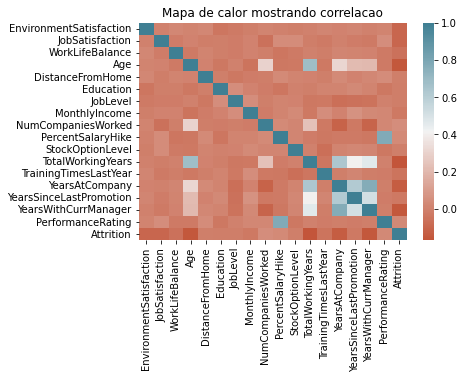

In [36]:
plt.figure()
plt.title("Mapa de calor mostrando correlacao")
sns.heatmap(corr,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [37]:
dfCat = dfTotal.select_dtypes("object")
dfCat.nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
dtype: int64

In [38]:
for col in dfCat:
    print(dfCat[col].unique())

['No' 'Yes']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']


In [39]:
def changeAttrition(option):
    if option == "No":
        return 0
    elif option == "Yes":
        return 1

def changeTravel(trav):
    if trav == "Travel_Rarely":
        return 0
    elif trav == "Travel_Frequently":
        return 1
    elif trav == "Non-Travel":
        return 2

def changeDep(department):
    if department == "Sales":
        return 0 
    elif department == "Research & Development":
        return 1
    elif department == "Human Resources":
        return 2
    
def changestudyField(field):
    if field == "Life Sciences":
        return 0 
    elif field == "Other":
        return 1
    elif field == "Medical":
        return 2
    elif field == "Marketing":
        return 3
    elif field == "Technical Degree":
        return 4
    elif field == "Human Resources":
        return 5
    
def changeSex(sex):
    if sex == "Female":
        return 0 
    elif sex == "Male":
        return 1

def changeFunction(func):
    if func == "Healthcare Representative":
        return 0 
    elif func == "Research Scientist":
        return 1
    elif func == "Sales Executive":
        return 2
    elif func == "Marketing":
        return 3
    elif func == "Human Resources":
        return 4
    elif func == "Research Director":
        return 5
    elif func == "Laboratory Technician":
        return 6
    elif func == "Manufacturing Director":
        return 7
    elif func == "Sales Representative":
        return 8
    elif func == "Manager":
        return 9

def changeMarStatus(status):
    if status == "Married":
        return 0
    elif status == "Single":
        return 1
    elif status == "Divorced":
        return 2

In [40]:
dfCatChange = dfCat.copy()

In [41]:
dfCatChange["AttritionNum"] = dfCat.Attrition.map(changeAttrition)
dfCatChange["TravelNum"] = dfCat.BusinessTravel.map(changeTravel)
dfCatChange["DepartmentNum"] = dfCat.Department.map(changeDep)
dfCatChange["EduFieldNum"] = dfCat.EducationField.map(changestudyField)
dfCatChange["genderNum"] = dfCat.Gender.map(changeSex)
dfCatChange["jobRoleNum"] = dfCat.JobRole.map(changeFunction)
dfCatChange['maritalStatusNum'] = dfCat.MaritalStatus.map(changeMarStatus)

In [42]:
colunas = dfCat.columns
type(colunas)

pandas.core.indexes.base.Index

In [43]:
dfCatChange.drop(dfCat.columns.values, axis = 1, inplace=True)

In [44]:
dfCatChange

,AttritionNum,TravelNum,DepartmentNum,EduFieldNum,genderNum,jobRoleNum,maritalStatusNum
0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,1
2,0,1,1,1,1,2,0
3,0,2,1,0,1,4,0
4,0,0,1,2,1,2,1
...,...,...,...,...,...,...,...
4404,0,0,0,1,0,4,1
4405,0,0,1,2,0,1,1
4406,0,0,1,2,1,6,2
4407,0,0,1,0,1,2,0


In [45]:
dfFinal = pd.concat([dfCatChange, dfTotal.drop(dfCat.columns.values, axis = 1)], axis = 1)
dfFinal

,AttritionNum,TravelNum,DepartmentNum,EduFieldNum,genderNum,jobRoleNum,maritalStatusNum,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,0,0,0,0,0,0,0,3.0,4.0,2.0,...,131160,1.0,11,0,1.0,6,1,0,0,3
1,1,1,1,0,0,1,1,3.0,2.0,4.0,...,41890,0.0,23,1,6.0,3,5,1,4,4
2,0,1,1,1,1,2,0,2.0,2.0,1.0,...,193280,1.0,15,3,5.0,2,5,0,3,3
3,0,2,1,0,1,4,0,4.0,4.0,3.0,...,83210,3.0,11,3,13.0,5,8,7,5,3
4,0,0,1,2,1,2,1,4.0,1.0,3.0,...,23420,4.0,12,2,9.0,2,6,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,0,0,0,1,0,4,1,3.0,4.0,3.0,...,35390,1.0,18,0,6.0,2,6,1,5,3
4405,0,0,1,2,0,1,1,4.0,1.0,3.0,...,60290,3.0,17,1,10.0,5,3,0,2,3
4406,0,0,1,2,1,6,2,4.0,4.0,3.0,...,26790,2.0,15,0,10.0,2,3,0,2,3
4407,0,0,1,0,1,2,0,1.0,3.0,3.0,...,37020,0.0,20,0,5.0,4,4,1,2,4


In [46]:
dfFinal.columns

Index(['AttritionNum', 'TravelNum', 'DepartmentNum', 'EduFieldNum',
       'genderNum', 'jobRoleNum', 'maritalStatusNum',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

<AxesSubplot:>

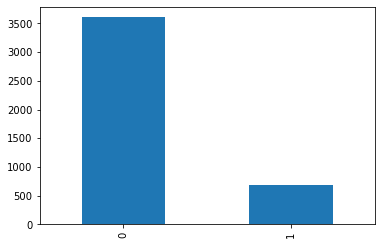

In [47]:
dfFinal.AttritionNum.value_counts().plot(kind = 'bar')

In [48]:
def printMetricas(y_true, y_pred):
    print("Accuracia de ", accuracy_score(y_true, y_pred))
    print("Precision de ", precision_score(y_true,y_pred))
    print("Recall de ", recall_score(y_true, y_pred))
    print("Confusion matrix \n")
    print(confusion_matrix(y_test,predictions))

In [49]:
def desenharCurvas(estimator, X, y_true):
    plot_confusion_matrix(estimator, X, y_true)
    
    plot_roc_curve(estimator,X, y_true)

In [50]:
X = dfFinal.drop("AttritionNum", axis = 1)
y = dfFinal.AttritionNum

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [51]:
modelTree = tree.DecisionTreeClassifier()
modelTree.fit(X_train, y_train)
predictions = modelTree.predict(X_test)

In [52]:
printMetricas(y_test, predictions)

Accuracia de  0.9813953488372092
Precision de  0.9174311926605505
Recall de  0.970873786407767
Confusion matrix 

[[1066   18]
 [   6  200]]


In [53]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
predRF = modelRF.predict(X_test)

In [54]:
printMetricas(y_test, predRF)

Accuracia de  0.9883720930232558
Precision de  0.9847715736040609
Recall de  0.941747572815534
Confusion matrix 

[[1066   18]
 [   6  200]]


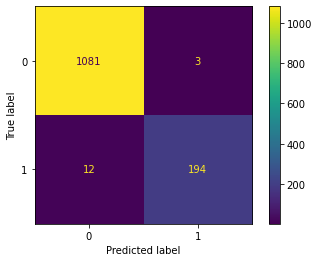

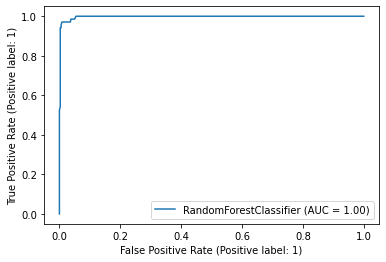

In [55]:
desenharCurvas(modelRF, X_test, y_test)

In [56]:
dfImportancias = pd.DataFrame({"Variaveis":dfFinal.drop("AttritionNum", axis = 1).columns, "Importancia":modelRF.feature_importances_})

In [57]:
dfImportancias.sort_values(by = "Importancia", inplace=True, ascending=False)
dfImportancias

,Variaveis,Importancia
9,Age,0.096020
13,MonthlyIncome,0.090526
17,TotalWorkingYears,0.086041
10,DistanceFromHome,0.062058
19,YearsAtCompany,0.057386
15,PercentSalaryHike,0.055971
14,NumCompaniesWorked,0.048065
4,jobRoleNum,0.047139
21,YearsWithCurrManager,0.046099
6,EnvironmentSatisfaction,0.041126


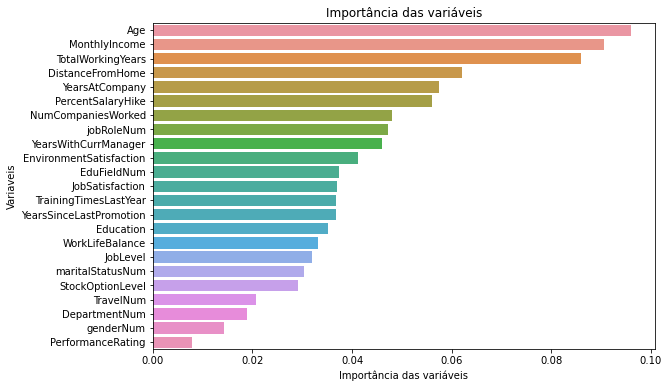

In [58]:
plt.figure(figsize=(9,6))
sns.barplot(x = dfImportancias.Importancia, y = dfImportancias.Variaveis, orient="h")
plt.xlabel("Importância das variáveis")
plt.ylabel('Variaveis')
plt.title('Importância das variáveis')
plt.show()

In [59]:
#Salvando o modelo em disco
dump(modelRF, 'modelRFHR.joblib')

['modelRFHR.joblib']

In [60]:
modelRFSalvo = load("modelRFHR.joblib")

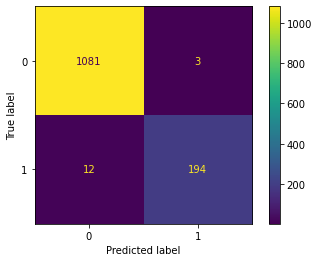

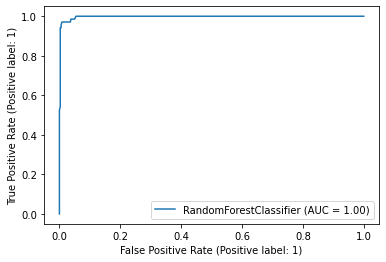

In [61]:
desenharCurvas(modelRFSalvo,X_test,y_test)

Conclusão:
De maneira geral o projeto me pareceu bem sucedido do ponto de vista de criação do modelo, claro que é sempre possível criar modelos mais elaborados afim de tentar melhorar as métricas de precision/recall/F1 entretanto para a finalidade desse projeto que é a de demonstrar que é possível, através de uma série de variáveis preditoras, prever a possibilidade de um funcionário deixar ou não a empresa a performance alcançada foi muito boa.

Das variáveis analisadas através dos dados fornecidos podemos ver que:
Idade, salário e distância do trabalho são as variáveis que mais influenciam no funcionário se demitir ou não
Outras variáveis poderiam ser analisadas, tais como: benefícios oferecidos pela empresa, envolvimento em projetos e fornecimento de treinamento, entretanto essas variáveis não foram fornecidas no dataset, o que inviabiliza o seu uso nesse projeto.

Nos outros scripts fornecidos temos: carregar o modelo, converter os dados já formatados para JSON e posterior envio do mesmo ao modelo para realização das predições.